In [15]:
import run
import sklearn
from sklearn import datasets
import numpy as np
import sys

__Problem 1__

For the first problem we are asked to report the optimal solution for ridge regression and lasso given that $\alpha = 1$ 

In [2]:
xvals, yvals = run.readInData("./house_scale.txt") 
run.Problem1(xvals,yvals)

Optimal Lasso Parameters:
[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.42655753 -2.11418534  0.
 -9.46050116]
Optimal Ridge Regression Parameters:
[-4.3675816   2.19284644  0.15882599  1.3732729  -4.07351976  9.78790245
  0.03561058 -7.69095705  3.30454181 -3.05419625 -4.45039373  1.85375177
 -9.4539433 ]


__Problem 2__

For the second problem we are asked to split the data into testing and training, then to plot the testing error for both the testing and training data for the Ridge Regression and the Lasso models. 

/Users/ellieodole/Desktop/CS5430/HousePrices/run.py:67: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Lasso_2.fit(train_x,train_y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.461e+03, tolerance: 3.352e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


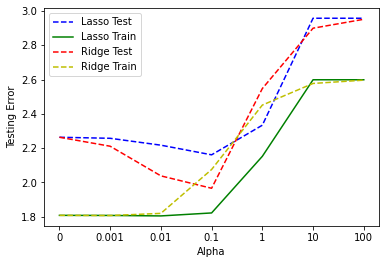

In [3]:
run.Problem2(xvals,yvals)

As alpha increases, the testing error also tends to increase and when plotted on a log10 scale, the testing error appears to form a logistic curve, with the testing error starting to plateau at $\alpha=10$


__Problem 3__ 

For problem 3 we are asked to do a 5-fold cross-validation to select the best $\alpha$ then report the $\alpha$ and the testing error

In [4]:
run.Problem3_4(xvals,yvals)

Lasso Optimal alpha:  0.1
Lasso Testing Error:  2.161117898467248
Ridge Regression Optimal alpha:  8.0
Ridge Regression Testing Error:  2.038255722872835


__Problem 4__

For problem 4 we are asked to follow the same procedure as problem 3, but to use the non-scaled data. 

In [5]:
xvals, yvals = run.readInData("./house.txt")
run.Problem3_4(xvals,yvals) 

Lasso Optimal alpha:  0.1
Lasso Testing Error:  2.206250188295328
Ridge Regression Optimal alpha:  80.0
Ridge Regression Testing Error:  2.0329075900570777


__Problem 5__

For problem 5 we are asked to follow the same procedure as problems 1-3 for on the E2006-tfidf dataset. This dataset comes from the LibSVM website which can conviently be read using a scikitlearn function

In [6]:
#Read in the Data
#Note that for our purposes the training 
#and test datasets are flipped from the websites labeling
train_x, train_y = sklearn.datasets.load_svmlight_file("./E2006.test")
test_x, test_y = sklearn.datasets.load_svmlight_file("./E2006.train")


In [7]:
#The test_x variable has two extra attributes which we will ignore
test_x = test_x[:, :-2]

(1) Optimal Parameters for dataset 

In [8]:
run.Problem1(train_x, train_y)

Optimal Lasso Parameters:
[ 0.  0.  0. ...  0. -0. -0.]
Optimal Ridge Regression Parameters:
[ 8.43763708e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -9.16315016e-05 -2.74894505e-04]


Because the parameters are abbreviated I will write the parameters to a text file.

In [16]:
a =1
Lasso_1 = sklearn.linear_model.Lasso(alpha=a, fit_intercept = True)
Lasso_1.fit(train_x, train_y)
RR_1 = sklearn.linear_model.Ridge(alpha=a, fit_intercept = True)
RR_1.fit(train_x, train_y)
with open("./Problem5_Q1.txt", 'w') as file:
        np.set_printoptions(threshold=sys.maxsize)
        file.write(str(Lasso_1.coef_))
        file.write(str(RR_1.coef_))

(2) Testing Error for testing and training data

/Users/ellieodole/Desktop/CS5430/HousePrices/run.py:67: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Lasso_2.fit(train_x,train_y)


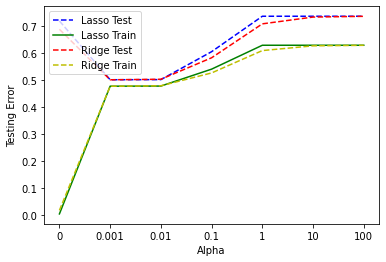

In [10]:
run.Problem2(None,None, train_x, train_y, test_x, test_y)

Due to the nonconvergence at $\alpha = 0$ we cannot take the RMSE at $\alpha = 0$ at face value. However, for the rest of the graph is appear to follow the same pattern as the other graph from problem 2, producing a logistic curve. 

(3) Cross Validation

In [11]:
run.Problem3_4(None, None, train_x, train_y, test_x, test_y)

Lasso Optimal alpha:  0.001
Lasso Testing Error:  0.5018545764290182
Ridge Regression Optimal alpha:  6.6160000000000005
Ridge Regression Testing Error:  0.501771074196799
